In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv('/content/Finance.csv')

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


**Handling missing value**

<Axes: xlabel='Gender', ylabel='count'>

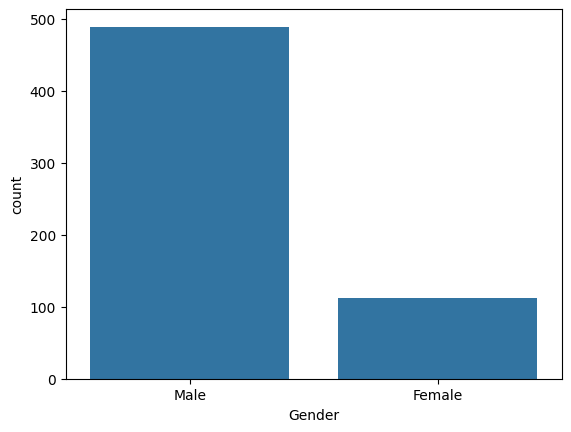

In [11]:
sns.countplot(x=data['Gender'])

In [14]:
data['Gender'].mode()[0]

'Male'

In [15]:
data["Gender"]=data["Gender"].fillna(data['Gender'].mode()[0])

<Axes: xlabel='Married', ylabel='count'>

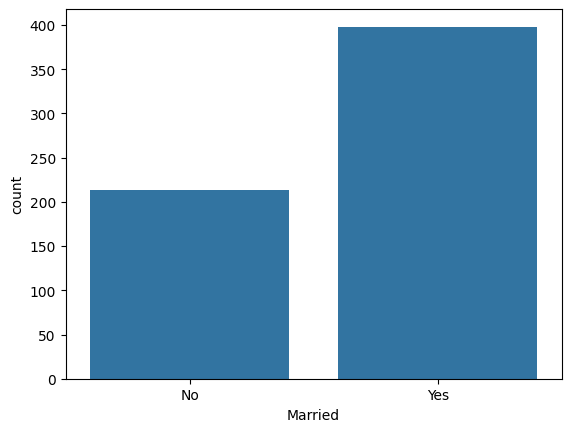

In [16]:
sns.countplot(x=data['Married'])

In [18]:
data["Married"].mode()[0]

'Yes'

In [19]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])


<Axes: xlabel='Self_Employed', ylabel='count'>

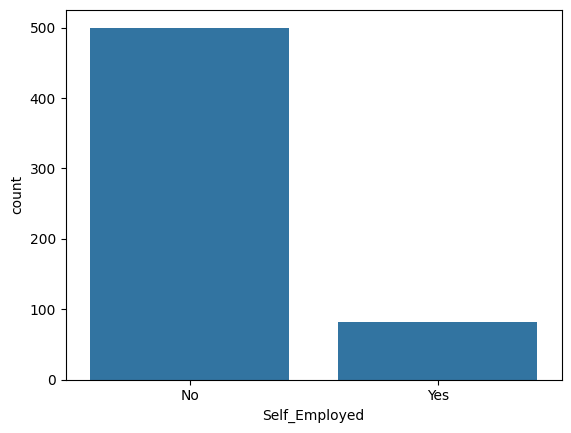

In [20]:
sns.countplot(x=data['Self_Employed'])

In [22]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

<Axes: xlabel='Dependents', ylabel='count'>

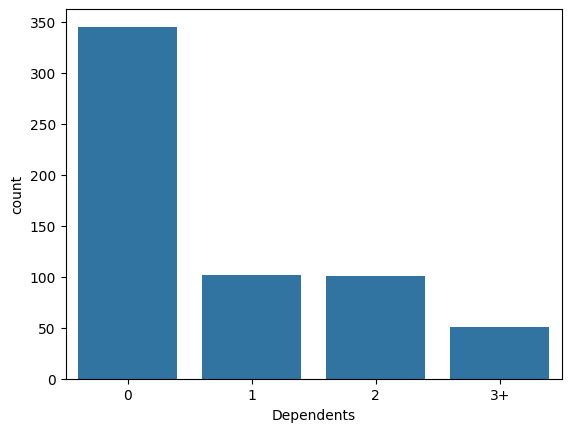

In [27]:
sns.countplot(x=data['Dependents'])

In [28]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [23]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())

In [24]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [25]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [29]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [32]:
data.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,128.0,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [35]:
data.replace({
    'Gender': {'Male': 1, "Female": 0},
    'Married': {"Yes": 1, "No": 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
}, inplace=True)


**Train test spliting**

In [36]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

def prepare_data(data):
    y = data["Loan_Status"]
    x = data.drop(columns=["Loan_Status", "Loan_ID"], axis=1)
    x = pd.get_dummies(data=x, columns=['Property_Area', 'Dependents'])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test, features



In [44]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Train the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Make predictions
Random_Forest_predict = model.predict(x_test)

# Compute the confusion matrix
Random_Forest_confusion = confusion_matrix(y_test, Random_Forest_predict)
print('Random Forest Confusion Matrix')
print(Random_Forest_confusion)

# Compute and print the accuracy score
print('Random Forest Accuracy Score')
Random_Forest_acc_score = accuracy_score(y_test, Random_Forest_predict)
print(Random_Forest_confusion)
print(Random_Forest_acc_score * 100)


Random Forest Confusion Matrix
[[19 24]
 [ 4 76]]
Random Forest Accuracy Score
[[19 24]
 [ 4 76]]
77.23577235772358


In [48]:
importance = pd.DataFrame(model.feature_importances_)
importance['features'] = features
importance.columns = ['importance', 'features']
importance.sort_values(by='importance', ascending=False)


,importance,features
8,0.252538,Credit_History
4,0.187293,ApplicantIncome
6,0.185187,LoanAmount
5,0.108779,CoapplicantIncome
7,0.053887,Loan_Amount_Term
1,0.029578,Married
2,0.022891,Education
0,0.022407,Gender
9,0.022199,Property_Area_Rural
10,0.022057,Property_Area_Semiurban


<Axes: xlabel='importance', ylabel='features'>

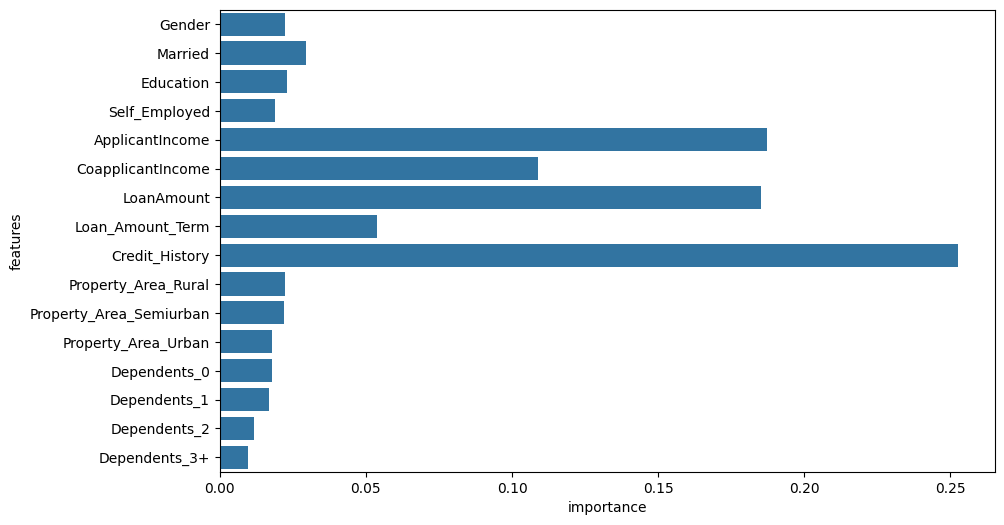

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='features', data=importance)

In [52]:
rf_proba=model.predict_proba(x_test)
rf_predict=model.predict(x_test)
print(rf_proba[0:10])
print(rf_predict)

[[0.24 0.76]
 [0.12 0.88]
 [0.24 0.76]
 [0.45 0.55]
 [0.08 0.92]
 [0.31 0.69]
 [0.04 0.96]
 [0.28 0.72]
 [0.17 0.83]
 [0.52 0.48]]
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 1]
